# Import libraries

In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt
from pylab import pcolor, colorbar

# Import dataset

In [67]:
dataset = pd.read_csv("D:\IT\IMT Courses\Deep Learning\SOM\Project\Credit_Card_Applications.csv")
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


# Define features and target 

In [68]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Data normalize

In [69]:
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

# Make model

In [70]:
SOM = MiniSom(x=10, y=10, input_len=15)
SOM.random_weights_init(X)
SOM.train(data=X, num_iteration=135)

# Distance map

In [71]:
DistanceMap = SOM.distance_map().round(2)
DistanceMap

array([[0.28, 0.39, 0.49, 0.5 , 0.45, 0.39, 0.45, 0.41, 0.35, 0.32],
       [0.35, 0.74, 0.51, 0.62, 0.74, 0.61, 0.79, 0.67, 0.67, 0.38],
       [0.45, 0.56, 0.65, 0.55, 0.52, 0.6 , 0.49, 0.67, 0.7 , 0.39],
       [0.45, 0.68, 0.64, 0.73, 0.61, 0.37, 0.55, 0.67, 0.62, 0.4 ],
       [0.34, 0.64, 0.66, 0.69, 0.76, 0.59, 0.52, 0.82, 0.8 , 0.52],
       [0.37, 0.68, 0.77, 0.7 , 0.73, 0.74, 0.67, 0.77, 0.84, 0.58],
       [0.53, 0.88, 0.78, 0.75, 0.74, 0.61, 0.72, 0.68, 0.75, 0.44],
       [0.63, 0.94, 0.88, 0.67, 0.74, 0.66, 0.64, 0.65, 0.59, 0.35],
       [0.61, 0.82, 0.71, 1.  , 0.7 , 0.85, 0.69, 0.7 , 0.67, 0.41],
       [0.33, 0.48, 0.53, 0.48, 0.54, 0.54, 0.49, 0.57, 0.36, 0.23]])

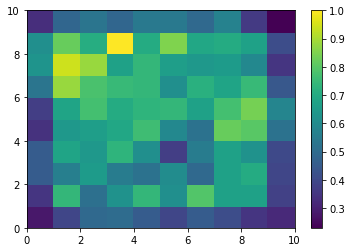

In [72]:
pcolor(DistanceMap)
colorbar()

# Neuron Selection

In [73]:
index = [] #index contains the coordinates of the neurons
for i in range(10):
    for j in range(10):
        if DistanceMap[i,j] < 0.4:
            index.append([i,j])
    
len(index)

15

# Mapping Neurons and Calculating Total Data Points

In [74]:
mappings = SOM.win_map(X)
fraud_list = []
summ = 0
for x in index:
    fraud_list.append(mappings[(x[0],x[1])])
    summ += len(mappings[(x[0],x[1])])
summ

67

# Transforming Data Back to Original Scale 

In [75]:
frauds = []
for x in fraud_list:
    for y in x:
        frauds.append(y)
        
frauds_array = np.asarray(frauds)

fraud_inverse_transformed = sc.inverse_transform(frauds)

# Counting Total Fraud Instances and Extracting Fraud IDs

In [76]:
count = 0
fraud_ID_list = []
for x in fraud_inverse_transformed:
    fraud_ID_list.append(x[0])
print('total frauds:', len(fraud_ID_list))

total frauds: 67


# Evaluating Predictions

In [77]:
right_prediction_index = []
wrong_prediction_index = []
for x in fraud_ID_list:
    for index, customer_id in enumerate(dataset['CustomerID']):
        if x == customer_id:
            if dataset['Class'][index] == 0:
                right_prediction_index.append(i)
            else:
                wrong_prediction_index.append(i)

In [78]:
len_right_prediction_index = len(right_prediction_index)
print('len right prediction index',len_right_prediction_index)

len_wrong_prediction_index = len(wrong_prediction_index)
print('len wrong prediction index',len_wrong_prediction_index)

print('right prediction:', len_right_prediction_index/len(fraud_ID_list)*100)

len right prediction index 56
len wrong prediction index 11
right prediction: 83.5820895522388
